# Algae Bloom Data Investigation
https://msoese.atlassian.net/browse/WABS-23

In [39]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [40]:
# Read in the data set
df = pd.read_csv("../../data/cleaned/site3_marina.csv")
df.dtypes

Date (mm.dd.yyyy)       object
Time 24hr               object
Temp C                 float64
Sp Cond (uS/cm)          int64
pH (mV)                float64
pH                     float64
Trubidity (NTU)        float64
Chlorophyll (ug/L)     float64
Chlorophyll RFU        float64
ODOSat%                float64
ODO (mg/L)             float64
BGA-Phycocyanin RFU    float64
FDOM RFU               float64
dtype: object

In [41]:
# Create a new column categorizing an algae bloom above an RFU threshhold 
df["bloom"] = df["BGA-Phycocyanin RFU"].apply(lambda x: 1 if x >= 1.0 else 0)
df["bloom"] = df["bloom"].astype("bool")
df['Sp Cond (uS/cm)'] = df['Sp Cond (uS/cm)'].astype('float64')
df.describe()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,FDOM RFU
count,18948.000000,18948.000000,18948.000000,18948.000000,18379.000000,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000
mean,18.437053,1867.193055,-118.197757,8.556322,103.633309,10.886553,3.100860,84.841403,7.948890,1.091419,2.943355
std,6.055328,222.582893,10.900900,0.183965,243.159818,9.649227,2.594681,20.415026,1.809884,1.156522,1.127060
min,6.000000,1.000000,-151.100000,7.360000,1.540000,-1.300000,-0.200000,2.100000,0.240000,-0.300000,-1.200000
25%,12.700000,1778.000000,-124.000000,8.450000,23.600000,6.100000,1.800000,78.200000,7.070000,0.500000,2.300000
50%,20.120000,1914.000000,-118.800000,8.590000,61.690000,8.900000,2.600000,82.600000,8.170000,0.800000,3.000000
75%,23.680000,2039.000000,-112.800000,8.660000,95.375000,12.500000,3.500000,89.600000,9.100000,1.200000,3.700000
max,28.750000,2205.000000,-49.600000,9.080000,3576.660000,640.600000,172.400000,221.400000,17.540000,13.700000,6.100000


In [42]:
# Add a single datetime column
df["Date (mm.dd.yyyy)"] = pd.to_datetime(df["Date (mm.dd.yyyy)"], format='%m/%d/%Y')
df["datetime"] = df["Date (mm.dd.yyyy)"].astype('str') + " " + df["Time 24hr"]
df["datetime"] = pd.to_datetime(df["datetime"])
df.head()

,Date (mm.dd.yyyy),Time 24hr,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,FDOM RFU,bloom,datetime
0,2017-05-05,0:00,15.75,1806.0,-104.7,8.33,6.41,3.2,1.0,90.0,8.88,0.2,3.1,False,2017-05-05 00:00:00
1,2017-05-05,0:15,15.74,1808.0,-104.6,8.33,2.36,3.1,1.0,89.8,8.87,0.2,3.1,False,2017-05-05 00:15:00
2,2017-05-05,0:30,15.69,1810.0,-104.5,8.33,7.16,3.5,1.1,89.6,8.85,0.2,3.1,False,2017-05-05 00:30:00
3,2017-05-05,0:45,15.65,1814.0,-104.5,8.33,4.96,3.1,1.0,89.6,8.86,0.3,3.1,False,2017-05-05 00:45:00
4,2017-05-05,1:00,15.63,1821.0,-104.5,8.33,6.72,3.1,1.0,89.5,8.86,0.3,3.1,False,2017-05-05 01:00:00


In [43]:
# The marina data set contains about a weeks worth of bad turbidity data
# So we will replace the empty values with mean values.
print("Number null:", df['Trubidity (NTU)'].isnull().sum())
mean = df['Trubidity (NTU)'].mean()
df['Trubidity (NTU)'] = df['Trubidity (NTU)'].fillna(mean)
print("Number null:", df['Trubidity (NTU)'].isnull().sum())
df.describe()

Number null: 569
Number null: 0


,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,FDOM RFU
count,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000,18948.000000
mean,18.437053,1867.193055,-118.197757,8.556322,103.633309,10.886553,3.100860,84.841403,7.948890,1.091419,2.943355
std,6.055328,222.582893,10.900900,0.183965,239.480803,9.649227,2.594681,20.415026,1.809884,1.156522,1.127060
min,6.000000,1.000000,-151.100000,7.360000,1.540000,-1.300000,-0.200000,2.100000,0.240000,-0.300000,-1.200000
25%,12.700000,1778.000000,-124.000000,8.450000,25.177500,6.100000,1.800000,78.200000,7.070000,0.500000,2.300000
50%,20.120000,1914.000000,-118.800000,8.590000,63.510000,8.900000,2.600000,82.600000,8.170000,0.800000,3.000000
75%,23.680000,2039.000000,-112.800000,8.660000,100.225000,12.500000,3.500000,89.600000,9.100000,1.200000,3.700000
max,28.750000,2205.000000,-49.600000,9.080000,3576.660000,640.600000,172.400000,221.400000,17.540000,13.700000,6.100000


## Features vs BGA RFU Charts

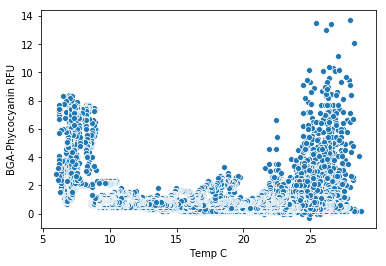

In [44]:
sns.scatterplot(x='Temp C', y='BGA-Phycocyanin RFU', data=df)

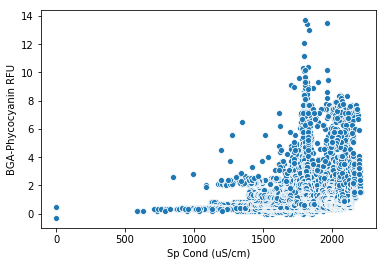

In [45]:
sns.scatterplot(x='Sp Cond (uS/cm)', y='BGA-Phycocyanin RFU', data=df)

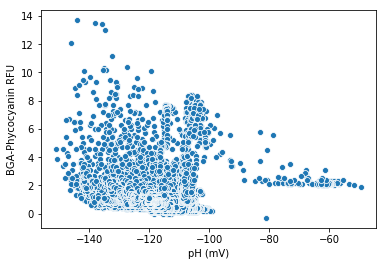

In [46]:
sns.scatterplot(x='pH (mV)', y='BGA-Phycocyanin RFU', data=df)

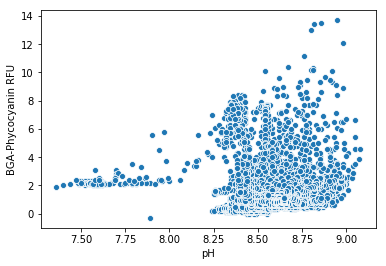

In [47]:
sns.scatterplot(x='pH', y='BGA-Phycocyanin RFU', data=df)

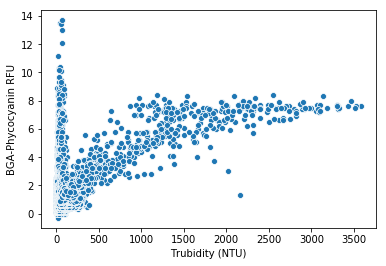

In [48]:
sns.scatterplot(x='Trubidity (NTU)', y='BGA-Phycocyanin RFU', data=df)

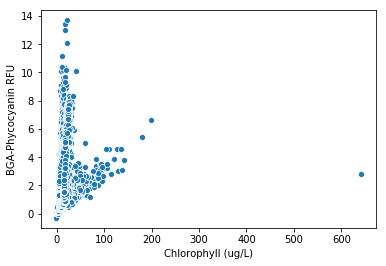

In [49]:
sns.scatterplot(x='Chlorophyll (ug/L)', y='BGA-Phycocyanin RFU', data=df)

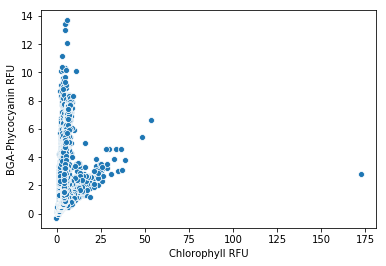

In [50]:
sns.scatterplot(x='Chlorophyll RFU', y='BGA-Phycocyanin RFU', data=df)

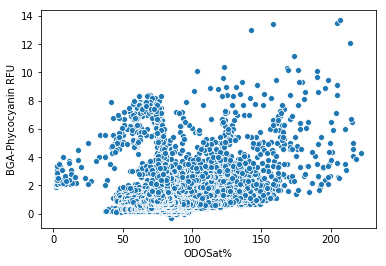

In [51]:
sns.scatterplot(x='ODOSat%', y='BGA-Phycocyanin RFU', data=df)

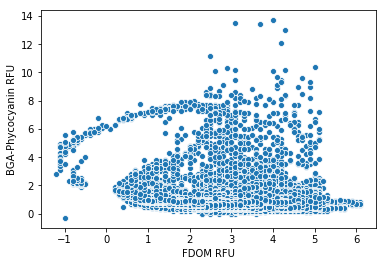

In [52]:
sns.scatterplot(x='FDOM RFU', y='BGA-Phycocyanin RFU', data=df)

## Classified Scatter Plot Matrix

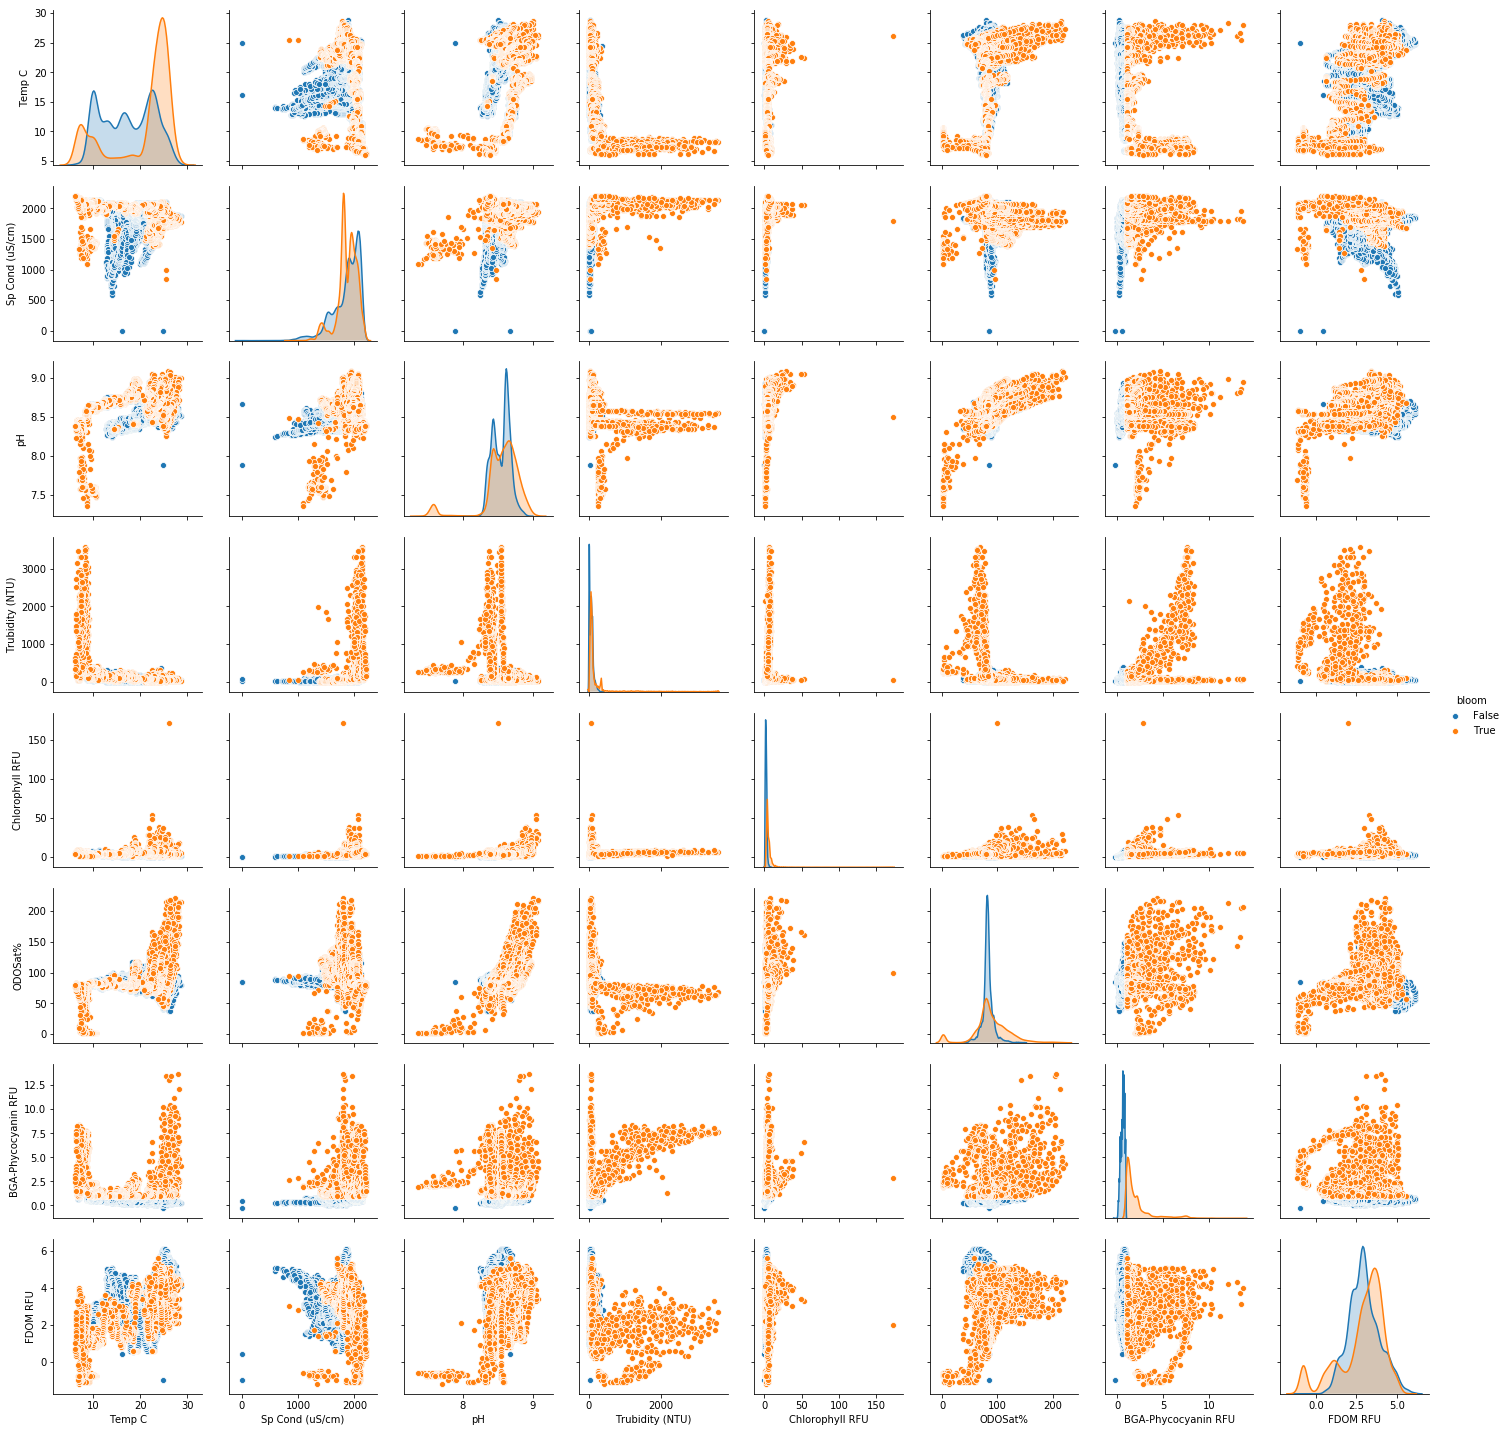

In [53]:
# Create a scatter matrix plot without colinear variables (i.e. ODO and ODOSat%) variables and the datetime column
plot_df = df.drop(columns=['Date (mm.dd.yyyy)', 'Time 24hr', 'bloom', 'datetime', 'ODO (mg/L)', 'pH (mV)', 'Chlorophyll (ug/L)'])
# categorized_scatter_plots(df, plot_df.columns, 'bloom')
sns.pairplot(data=df, hue='bloom', vars=plot_df.columns)

## Variables over time

In [54]:
# Scale the data for visual line plot comparisons. 
scaled_columns = ['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Trubidity (NTU)', 'Chlorophyll (ug/L)', 'Chlorophyll RFU', 
                  'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU', 'FDOM RFU']
scaler = StandardScaler()
for column in scaled_columns:
    scaled_data = scaler.fit_transform(df[[column]].values)
    df[column] = pd.DataFrame(scaled_data)
df.describe()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,FDOM RFU
count,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04
mean,-2.735363e-15,3.161921e-16,1.860413e-14,-7.721874e-16,5.732754e-16,-1.052954e-14,1.817970e-15,-8.354153e-16,1.272643e-17,-1.827567e-15,-1.511440e-14
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-2.053957e+00,-8.384482e+00,-3.018385e+00,-6.503150e+00,-4.263223e-01,-1.262990e+00,-1.272198e+00,-4.053073e+00,-4.259441e+00,-1.203137e+00,-3.676347e+00
25%,-9.474639e-01,-4.007289e-01,-5.322860e-01,-5.779616e-01,-3.276166e-01,-4.960687e-01,-5.013698e-01,-3.253279e-01,-4.856184e-01,-5.113902e-01,-5.708412e-01
50%,2.779356e-01,2.102955e-01,-5.524855e-02,1.830718e-01,-1.675473e-01,-2.058823e-01,-1.930386e-01,-1.097947e-01,1.221715e-01,-2.519850e-01,5.025995e-02
75%,8.658632e-01,7.718988e-01,4.951793e-01,5.635885e-01,-1.423245e-02,1.672144e-01,1.538341e-01,2.330990e-01,6.360302e-01,9.388859e-02,6.713611e-01
max,1.703164e+00,1.517708e+00,6.293019e+00,2.846689e+00,1.450270e+01,6.526223e+01,6.525027e+01,6.689299e+00,5.299436e+00,1.090244e+01,2.800851e+00


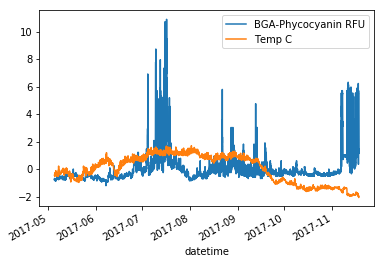

In [55]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Temp C'])

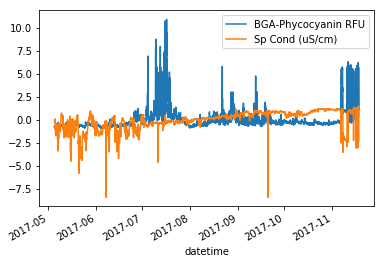

In [56]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Sp Cond (uS/cm)'])

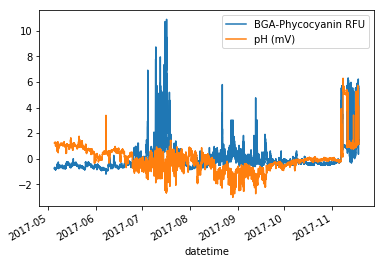

In [57]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'pH (mV)'])

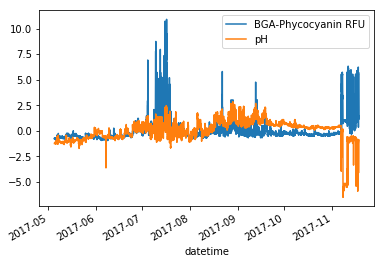

In [58]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'pH'])

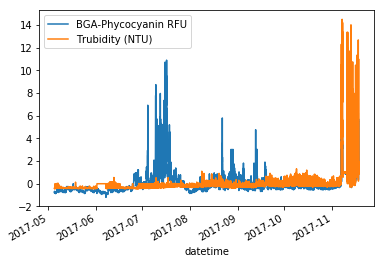

In [59]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Trubidity (NTU)'])

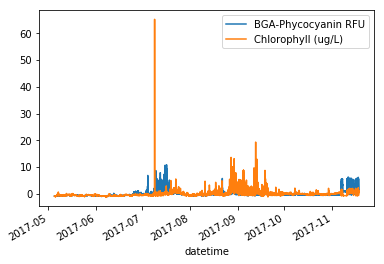

In [60]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Chlorophyll (ug/L)'])

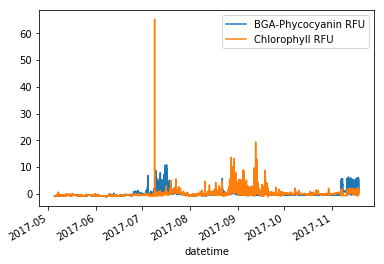

In [61]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Chlorophyll RFU'])

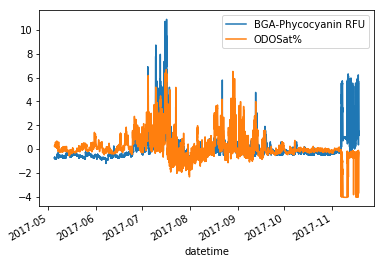

In [62]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'ODOSat%'])

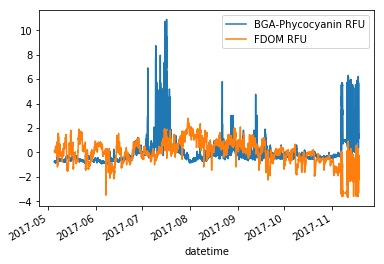

In [63]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'FDOM RFU'])